# ⚡ Energy Usage Forecasting with Prophet
This notebook demonstrates a simple univariate time series forecasting workflow using Facebook Prophet.

We will use historical energy consumption data to forecast future demand.

In [17]:
# 📦 Install dependencies (uncomment if running in a fresh environment)
# !pip install pandas matplotlib prophet

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

## 🔹 Load Dataset
Replace `energy.csv` with the actual dataset you're using (e.g., Open Power System Data).

In [19]:
df =  pd.read_csv("time_series_60min_singleindex.csv", parse_dates=["utc_timestamp"])
df = df[["utc_timestamp", "DE_load_actual_entsoe_transparency"]]
df = df.rename(columns={"utc_timestamp": "ds", "DE_load_actual_entsoe_transparency": "y"})
df["ds"] = df["ds"].dt.tz_localize(None)
df = df.sort_values('ds')
df = df.set_index("ds").resample("D").mean().reset_index()
df.head()

,ds,y
0,2014-12-31,NaN
1,2015-01-01,45346.541667
2,2015-01-02,51941.166667
3,2015-01-03,46564.750000
4,2015-01-04,45082.500000


## 📉 Visualize the time series

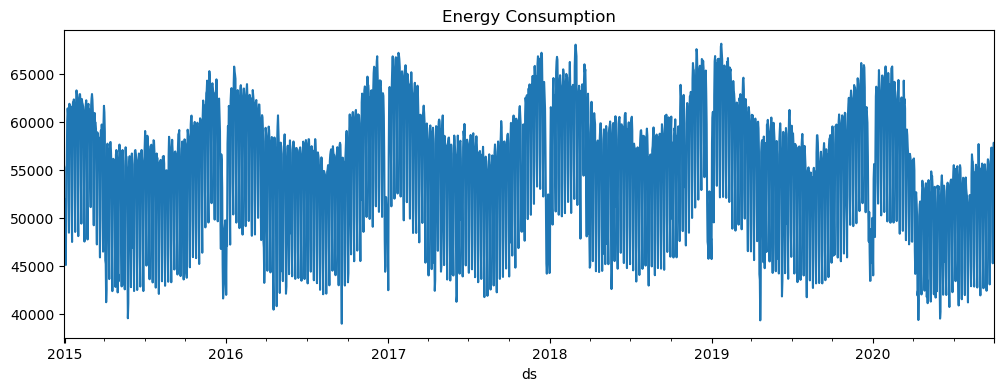

In [20]:
df.set_index('ds')['y'].plot(figsize=(12, 4), title='Energy Consumption');

## 📈 Forecast with Prophet

In [21]:
model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=30)  # Forecast 30 days ahead
forecast = model.predict(future)

13:54:13 - cmdstanpy - INFO - Chain [1] start processing
13:54:13 - cmdstanpy - INFO - Chain [1] done processing


## 📊 Visualize forecast with confidence intervals

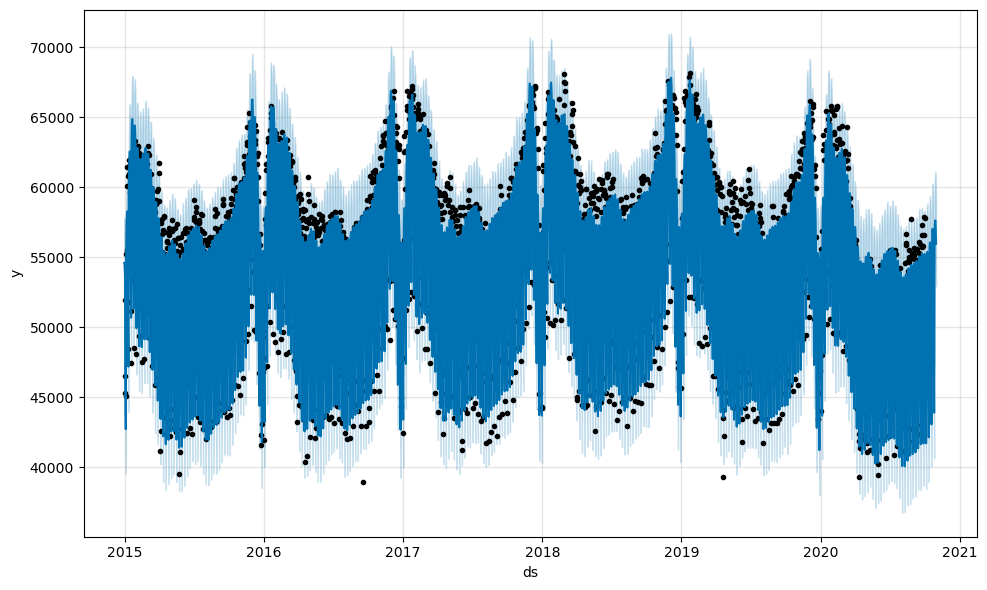

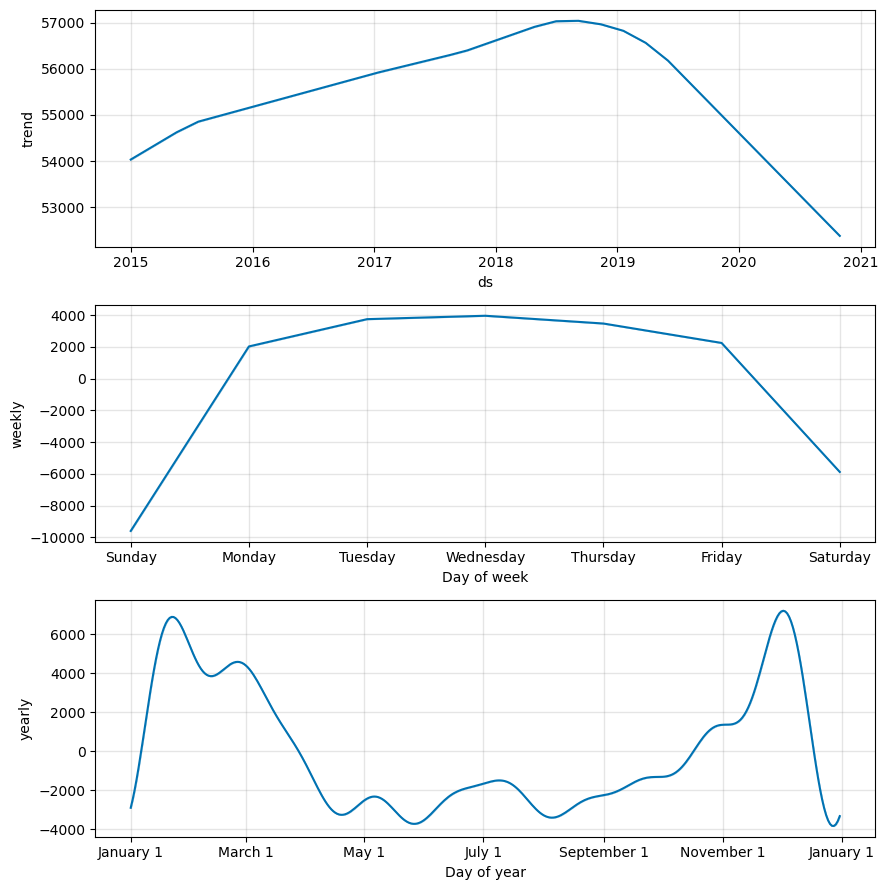

In [22]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

## 🚨 Anomaly Detection (Simple Residuals)

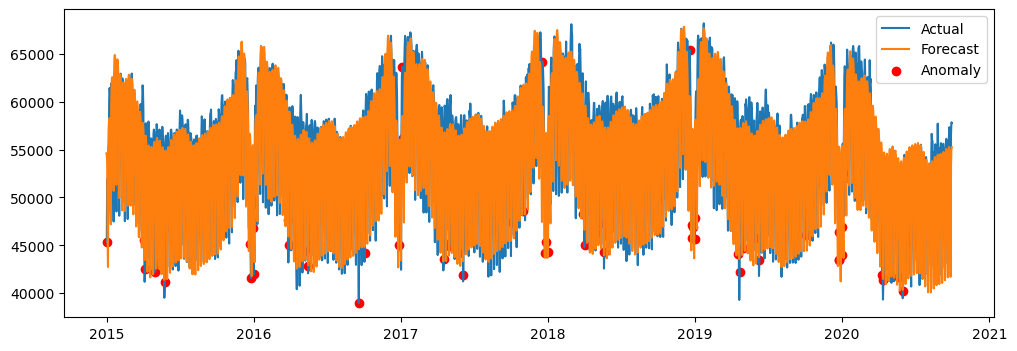

In [23]:
df_merged = df.merge(forecast[['ds', 'yhat']], on='ds')
df_merged['residual'] = df_merged['y'] - df_merged['yhat']
threshold = 2 * df_merged['residual'].std()
df_merged['anomaly'] = df_merged['residual'].abs() > threshold

plt.figure(figsize=(12, 4))
plt.plot(df_merged['ds'], df_merged['y'], label='Actual')
plt.plot(df_merged['ds'], df_merged['yhat'], label='Forecast')
plt.scatter(df_merged['ds'][df_merged['anomaly']], df_merged['y'][df_merged['anomaly']],
            color='red', label='Anomaly')
plt.legend();